#Bicicletas en Nueva York 🚲🗽

Este conjunto de datos se trata de la recopilación de datos durante los años 2016 - 2017 de las **Citi Bike** de la ciudad de Nueva York

##Preguntas de Interes
* **¿Qué género realiza los viajes más largos en promedio?**

  Hipótesis: Los hombres tienden a realizar viajes más largos que las mujeres.
* **¿Qué rangos etarios (según año de nacimiento) usan más el servicio?**

  Hipótesis: Los usuarios nacidos entre 1980 y 2000 son los más activos.
* **¿Existe relación entre la edad del usuario y la duración del viaje?**

  Hipótesis: Las personas más jóvenes realizan viajes más largos.

#Conociendo el dataset

In [ ]:
# Importaciones
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/CoderHouse/NYC-BikeShare-2015-2017-combined.csv'
print("Path to dataset files:", path)
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Path to dataset files: /content/drive/MyDrive/CoderHouse/NYC-BikeShare-2015-2017-combined.csv


In [ ]:
# Vista rapida de los datos
df.head()

,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6
1,1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12
2,2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45
3,3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5
4,4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9


In [ ]:
# Descripcion
df.describe()

,Unnamed: 0,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender,Trip_Duration_in_min
count,735502.000000,7.355020e+05,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000
mean,10582.401084,9.343125e+02,3206.764183,40.723125,-74.046412,3203.387325,40.722371,-74.045415,24914.009133,1979.544239,1.123668,15.570669
std,7679.871929,4.063878e+04,26.546683,0.008121,0.011191,64.358120,0.095296,0.173044,753.768581,9.371192,0.519694,677.312437
min,0.000000,6.100000e+01,3183.000000,40.692640,-74.096937,147.000000,0.000000,-74.096937,14552.000000,1900.000000,0.000000,1.000000
25%,4484.000000,2.460000e+02,3186.000000,40.717732,-74.050656,3186.000000,40.716540,-74.050444,24486.000000,1975.000000,1.000000,4.000000
50%,9156.000000,3.830000e+02,3202.000000,40.721525,-74.044247,3199.000000,40.721124,-74.043845,24602.000000,1982.000000,1.000000,6.000000
75%,15003.000000,6.520000e+02,3211.000000,40.727596,-74.038051,3211.000000,40.727224,-74.036486,24711.000000,1986.000000,1.000000,11.000000
max,34148.000000,2.026021e+07,3426.000000,40.752559,-74.032108,3442.000000,40.801343,0.000000,29296.000000,2000.000000,2.000000,337670.000000


In [ ]:
# Chequeo de valores faltantes
df.isnull().sum()

,0
Unnamed: 0,0
Trip Duration,0
Start Time,0
Stop Time,0
Start Station ID,0
Start Station Name,0
Start Station Latitude,0
Start Station Longitude,0
End Station ID,0
End Station Name,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               735502 non-null  int64  
 1   Trip Duration            735502 non-null  int64  
 2   Start Time               735502 non-null  object 
 3   Stop Time                735502 non-null  object 
 4   Start Station ID         735502 non-null  int64  
 5   Start Station Name       735502 non-null  object 
 6   Start Station Latitude   735502 non-null  float64
 7   Start Station Longitude  735502 non-null  float64
 8   End Station ID           735502 non-null  int64  
 9   End Station Name         735502 non-null  object 
 10  End Station Latitude     735502 non-null  float64
 11  End Station Longitude    735502 non-null  float64
 12  Bike ID                  735502 non-null  int64  
 13  User Type                735502 non-null  object 
 14  Birt

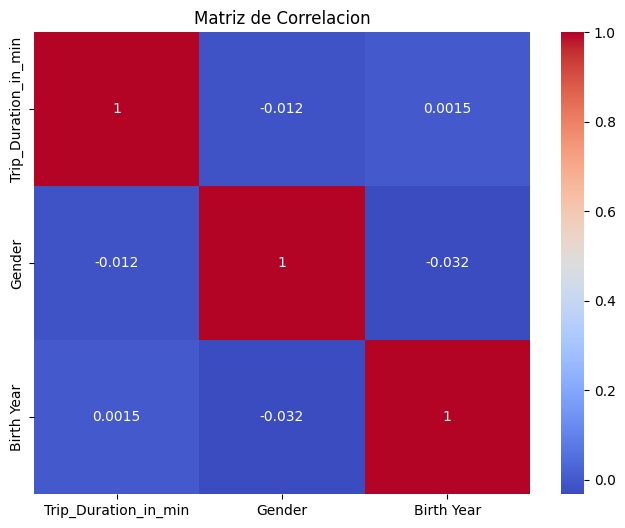

In [56]:
# Mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Trip_Duration_in_min', 'Gender','Birth Year']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlacion')
plt.show()



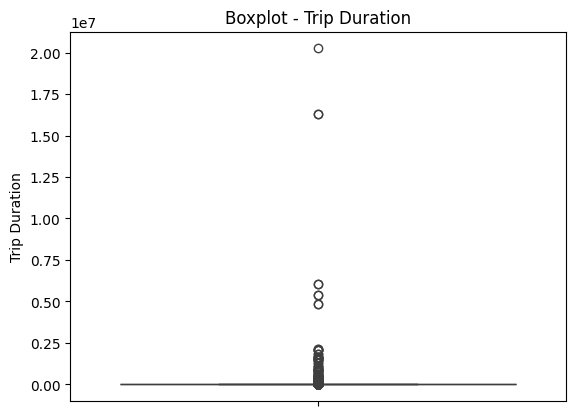

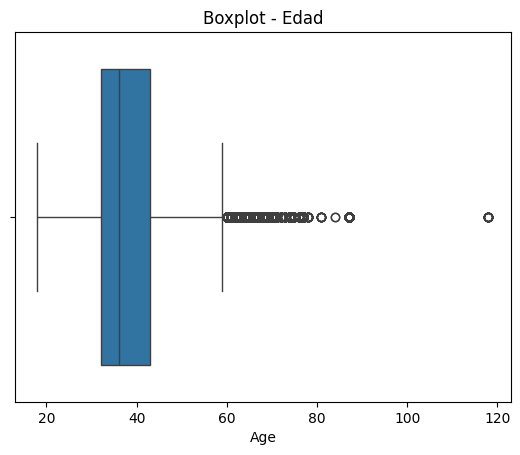

In [41]:
# Deteccion de outliers

# Outlier de duracion del viaje
sns.boxplot(df['Trip Duration'])
plt.title('Boxplot - Trip Duration')
plt.show()

# Outlier de Año de nacimiento (convertido a edad primero)
df['Age'] = 2018 - df['Birth Year']
sns.boxplot(x=df['Age'])
plt.title('Boxplot - Edad')
plt.show()


In [42]:
# Valores faltantes y/o atipicos
df['Trip Duration'].fillna(df['Trip Duration'].median(), inplace=True)

<ipython-input-42-3599660ff5b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trip Duration'].fillna(df['Trip Duration'].median(), inplace=True)


In [43]:
df

,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min,Age,Trip Duration (min)
0,0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6,58.0,6.266667
1,1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12,58.0,12.316667
2,2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45,35.0,45.233333
3,3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5,43.0,4.583333
4,4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9,34.0,9.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735497,12196,239,2017-03-31 21:26:40,2017-03-31 21:30:39,3195,Sip Ave,40.730743,-74.063784,3201,Dey St,40.737711,-74.066921,29276,Subscriber,1970.0,1,4,48.0,3.983333
735498,12197,192,2017-03-31 21:46:57,2017-03-31 21:50:09,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,26177,Subscriber,1976.0,1,3,42.0,3.200000
735499,12198,186,2017-03-31 22:03:56,2017-03-31 22:07:02,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,26240,Subscriber,1956.0,1,3,62.0,3.100000
735500,12199,618,2017-03-31 23:20:14,2017-03-31 23:30:32,3272,Jersey & 3rd,40.723332,-74.045953,3268,Lafayette Park,40.713464,-74.062859,24398,Subscriber,1984.0,1,10,34.0,10.300000


#Graficamos

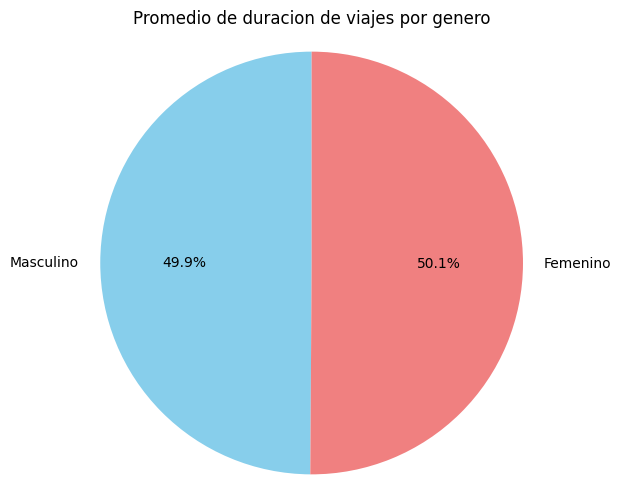

In [55]:
# Grafico
import matplotlib.pyplot as plt

df_genero_filtrado = df[df['Gender'].isin([1, 2])]
promedio_por_genero = df_genero_filtrado.groupby('Gender')['Trip Duration'].mean()
labels = ['Masculino', 'Femenino']
sizes = [promedio_por_genero[1], promedio_por_genero[2]]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Promedio de duracion de viajes por genero')
plt.axis('equal')  # Para que el circulo quede bien redondo
plt.show()


<ipython-input-38-545b8bdd1ccb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Edad'] = año_actual - df_filtrado['Birth Year']
<ipython-input-38-545b8bdd1ccb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Rango Etario'] = pd.cut(df_filtrado['Edad'], bins=bins, labels=labels, right=True)


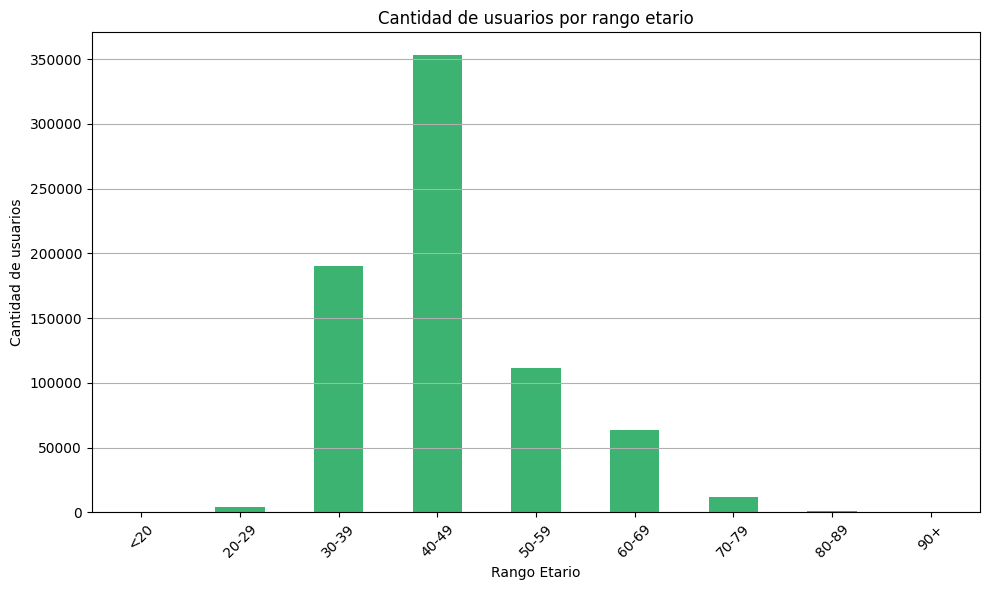

In [38]:
# Cantidad de usuarios por edad
import pandas as pd
import matplotlib.pyplot as plt

año_actual = 2018
df_filtrado = df[(df['Birth Year'] > 1900) & (df['Birth Year'] <= año_actual)]
df_filtrado['Edad'] = año_actual - df_filtrado['Birth Year']
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df_filtrado['Rango Etario'] = pd.cut(df_filtrado['Edad'], bins=bins, labels=labels, right=True)
conteo_rangos = df_filtrado['Rango Etario'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
conteo_rangos.plot(kind='bar', color='mediumseagreen')
plt.title('Cantidad de usuarios por rango etario')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de usuarios')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


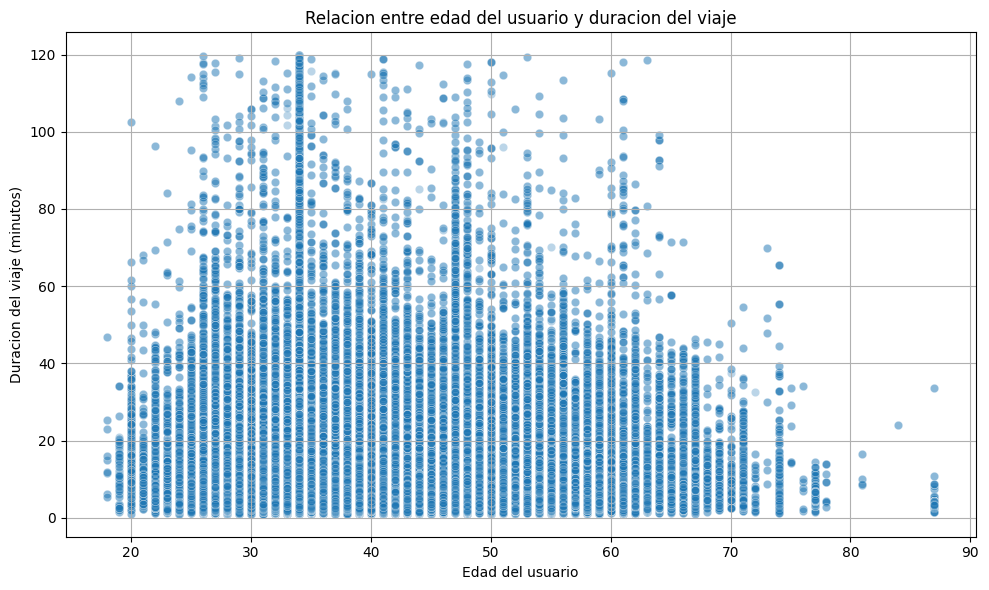

In [54]:
# Relacion por edad y duracion del viaje
import seaborn as sns
import matplotlib.pyplot as plt

año_actual = 2018
df_edad = df[(df['Birth Year'] > 1900) & (df['Birth Year'] <= año_actual)].copy()
df_edad['Edad'] = año_actual - df_edad['Birth Year']
df_edad['Trip Duration (min)'] = df_edad['Trip Duration'] / 60
df_edad = df_edad[df_edad['Trip Duration (min)'] <= 120]

# Graficamos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_edad, x='Edad', y='Trip Duration (min)', alpha=0.3)
plt.title('Relacion entre edad del usuario y duracion del viaje')
plt.xlabel('Edad del usuario')
plt.ylabel('Duracion del viaje (minutos)')
plt.grid(True)
plt.tight_layout()
plt.show()


#Analisis para el MetaData


In [48]:
valores_nulos = df.isnull().sum()
valores_nulos = valores_nulos[valores_nulos > 0].sort_values(ascending=False)

if not valores_nulos.empty:
    plt.figure(figsize=(10, 6))
    valores_nulos.plot(kind='bar', color='salmon')
    plt.title('Cantidad de valores nulos por columna')
    plt.xlabel('Columnas')
    plt.ylabel('Cantidad de valores nulos')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print(" No hay valores nulos en el dataset ✅")



 No hay valores nulos en el dataset ✅


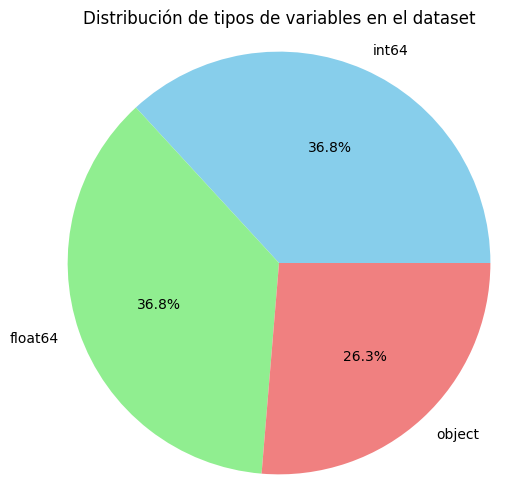

In [50]:
# Contamos los tipos de datos
tipos = df.dtypes.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(tipos, labels=tipos.index.astype(str), autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribucion de tipos de variables en el dataset')
plt.axis('equal')
plt.show()


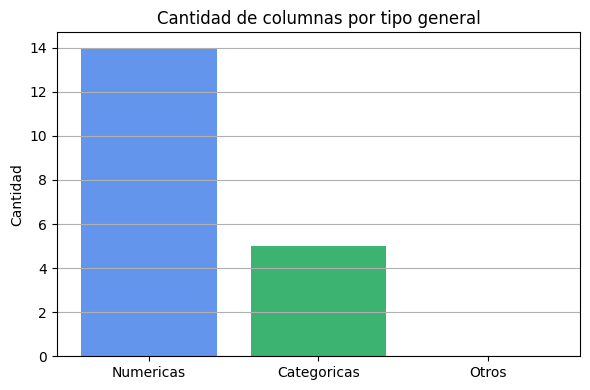

In [53]:
# Clasificamos por tipo general
tipos_columnas = {
    'Numericas': df.select_dtypes(include=['int64', 'float64']).shape[1],
    'Categoricas': df.select_dtypes(include=['object', 'category']).shape[1],
    'Otros': df.shape[1] - df.select_dtypes(include=['int64', 'float64', 'object', 'category']).shape[1]
}
plt.figure(figsize=(6, 4))
plt.bar(tipos_columnas.keys(), tipos_columnas.values(), color=['cornflowerblue', 'mediumseagreen', 'grey'])
plt.title('Cantidad de columnas por tipo general')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
